In [2]:
import geopandas as gpd

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [3]:
gdf = gpd.read_file("business_improvement_districts.shp")

# Print the first few rows of the GeoDataFrame
print(gdf.head())

   OBJECTID         borough                   bid_name property_b industrial  \
0         1       Islington                  Angel AIM       None       None   
1         2  Waltham Forest                 Argall BID       None          Y   
2         3       Southwark            Better Bankside       None       None   
3         4          Bexley            Bexleyheath BID       None       None   
4         5          Camden  Camden Town Unlimited BID       None       None   

  town_centr                              weblink   updated   Shape_Leng  \
0          Y             http://www.angelaim.org/  20171016  3120.671419   
1       None          http://www.argallbid.co.uk/  20171016  3096.763617   
2          Y     http://www.betterbankside.co.uk/  20171016  3470.169506   
3          Y     http://www.bexleyheathbid.co.uk/  20171016  3701.830533   
4          Y  http://www.camdentownunlimited.com/  20171016  4475.975507   

      Shape_Area                                           geo

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

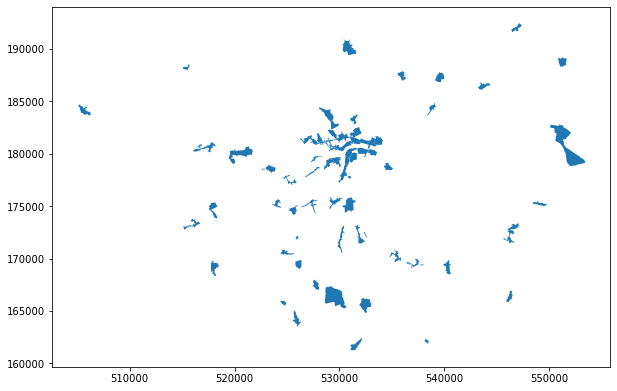

In [13]:
fig , ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax)

In [14]:
gdf.head()

,OBJECTID,borough,bid_name,property_b,industrial,town_centr,weblink,updated,Shape_Leng,Shape_Area,geometry
0,1,Islington,Angel AIM,None,None,Y,http://www.angelaim.org/,20171016,3120.671419,292779.281556,"POLYGON ((531764.771 183642.827, 531680.704 18..."
1,2,Waltham Forest,Argall BID,None,Y,None,http://www.argallbid.co.uk/,20171016,3096.763617,378456.363393,"POLYGON ((535866.149 187308.195, 535852.808 18..."
2,3,Southwark,Better Bankside,None,None,Y,http://www.betterbankside.co.uk/,20171016,3470.169506,507660.614663,"POLYGON ((532772.752 180399.234, 532762.445 18..."
3,4,Bexley,Bexleyheath BID,None,None,Y,http://www.bexleyheathbid.co.uk/,20171016,3701.830533,275868.573942,"POLYGON ((549793.896 175086.639, 549698.360 17..."
4,5,Camden,Camden Town Unlimited BID,None,None,Y,http://www.camdentownunlimited.com/,20171016,4475.975507,746547.488444,"POLYGON ((528155.075 184443.681, 528231.515 18..."


In [15]:
london_map = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

In [17]:
london_map = london_map.to_crs(gdf.crs)


In [18]:
joined_gdf = gpd.sjoin(gdf, london_map, how='left', op='intersects')


/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot:>

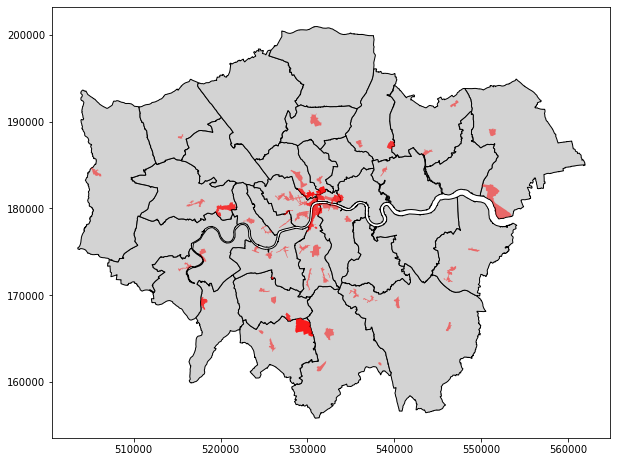

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
london_map.plot(ax=ax, color='lightgray', edgecolor='black')
joined_gdf.plot(ax=ax, color='red', alpha=0.5)


In [27]:
joined_gdf.head()

,OBJECTID,borough,bid_name,property_b,industrial,town_centr,weblink,updated,Shape_Leng,Shape_Area,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,bid_type
0,1,Islington,Angel AIM,None,None,Y,http://www.angelaim.org/,20171016,3120.671419,292779.281556,"POLYGON ((531764.771 183642.827, 531680.704 18...",27,Islington,E09000019,1485.664,0.000,T,None,None,NaN
1,2,Waltham Forest,Argall BID,None,Y,None,http://www.argallbid.co.uk/,20171016,3096.763617,378456.363393,"POLYGON ((535866.149 187308.195, 535852.808 18...",16,Waltham Forest,E09000031,3880.793,0.000,F,None,None,NaN
2,3,Southwark,Better Bankside,None,None,Y,http://www.betterbankside.co.uk/,20171016,3470.169506,507660.614663,"POLYGON ((532772.752 180399.234, 532762.445 18...",11,Southwark,E09000028,2991.340,105.139,T,None,None,NaN
3,4,Bexley,Bexleyheath BID,None,None,Y,http://www.bexleyheathbid.co.uk/,20171016,3701.830533,275868.573942,"POLYGON ((549793.896 175086.639, 549698.360 17...",14,Bexley,E09000004,6428.649,370.619,F,None,None,NaN
4,5,Camden,Camden Town Unlimited BID,None,None,Y,http://www.camdentownunlimited.com/,20171016,4475.975507,746547.488444,"POLYGON ((528155.075 184443.681, 528231.515 18...",25,Camden,E09000007,2178.932,0.000,T,None,None,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


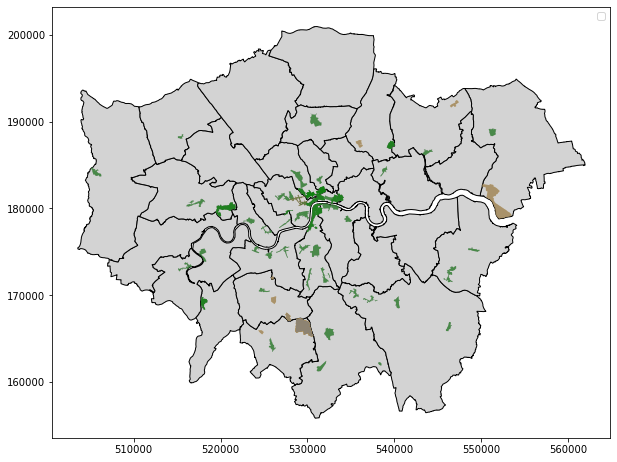

In [31]:


# Define the color mapping dictionary
color_mapping = {
    'property_b': {
        'Y': 'red',
        None: 'gray'
    },
    'industrial': {
        'Y': 'orange',
        None: 'gray'
    },
    'town_centr': {
        'Y': 'green',
        None: 'gray'
    }
}

# Plot the GeoDataFrame with color-coded columns and the London map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the London map
london_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot each column with a different color
for column, color_dict in color_mapping.items():
    for value, color in color_dict.items():
        if value is not None:
            joined_gdf[joined_gdf[column] == value].plot(ax=ax, color=color, alpha=0.5, label=f'{column}: {value}')
        else:
            joined_gdf[joined_gdf[column].isnull()].plot(ax=ax, color=color, alpha=0.5, label=f'{column}: None')

# Add a legend
ax.legend()

# Display the plot
plt.show()


In [29]:
percentage_y = {}

for column in ['property_b', 'industrial', 'town_centr']:
    counts = joined_gdf[column].value_counts()
    if 'Y' in counts.index:
        percentage = counts['Y'] / joined_gdf.shape[0] * 100
        percentage_y[column] = percentage
    else:
        percentage_y[column] = 0

print(percentage_y)

{'property_b': 3.260869565217391, 'industrial': 13.043478260869565, 'town_centr': 86.95652173913044}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


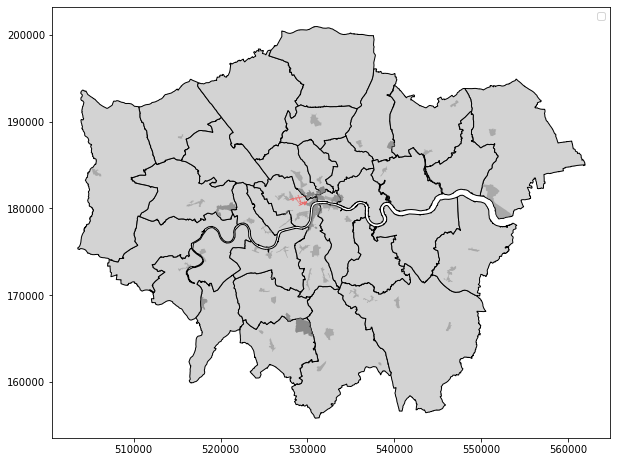

In [32]:
color_mapping = {
    'Y': 'red',
    None: 'gray'
}

# Plot the GeoDataFrame with color-coded 'property_b' column and the London map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the London map
london_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the 'property_b' column
for value, color in color_mapping.items():
    if value is not None:
        joined_gdf[joined_gdf['property_b'] == value].plot(ax=ax, color=color, alpha=0.5, label=f'property_b: {value}')
    else:
        joined_gdf[joined_gdf['property_b'].isnull()].plot(ax=ax, color=color, alpha=0.5, label='property_b: None')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [33]:
property_b_y = joined_gdf[joined_gdf['property_b'] == 'Y']

# Print the filtered GeoDataFrame
print(property_b_y)

    OBJECTID      borough                 bid_name property_b industrial  \
21        22  Westminster  Piccadilly and St James          Y       None   
24        25  Westminster          Heart of London          Y       None   
27        28  Westminster     New West End Company          Y       None   

   town_centr                                            weblink   updated  \
21          Y  https://heartoflondonbid.london/documents/summ...  20171016   
24          Y                   https://heartoflondonbid.london/  20171016   
27          Y          https://newwestend.com/about-us/bid-area/  20171016   

      Shape_Leng     Shape_Area  \
21   2996.191427  124097.788368   
24   2586.633415  125174.152042   
27  14851.458194  434908.832152   

                                             geometry  index_right  \
21  POLYGON ((529514.311 180625.062, 529518.195 18...           24   
24  POLYGON ((529971.319 180580.395, 529903.066 18...           24   
27  POLYGON ((528939.219 181567